In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [95]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv')

In [96]:
df.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In this database doesn't have column name. So, I am assigning column name to this dataset

In [97]:
df.columns=['Id number','refractive index','Sodium','Magnesium','Aluminum','Silicon','Potassium','Calcium','Barium','Iron','Type of glass']

In [98]:
df.head()

,Id number,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


Id number column will not contribute to target prediction, so need to remove. 

In [99]:
df.drop('Id number', axis=1, inplace=True)

In [100]:
df.head()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [101]:
df.shape

(213, 10)

In [102]:
df.dtypes

refractive index    float64
Sodium              float64
Magnesium           float64
Aluminum            float64
Silicon             float64
Potassium           float64
Calcium             float64
Barium              float64
Iron                float64
Type of glass         int64
dtype: object

There are 213 row and 10 columns. And in this dataset there are 9 float64 and 1 int64 datatype

In [103]:
df.isnull().sum()

refractive index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type of glass       0
dtype: int64

There is no null value in this dataset

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   refractive index  213 non-null    float64
 1   Sodium            213 non-null    float64
 2   Magnesium         213 non-null    float64
 3   Aluminum          213 non-null    float64
 4   Silicon           213 non-null    float64
 5   Potassium         213 non-null    float64
 6   Calcium           213 non-null    float64
 7   Barium            213 non-null    float64
 8   Iron              213 non-null    float64
 9   Type of glass     213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


There are 213 row and 10 columns in this dataset

In [105]:
for i in df.columns:
    print(df[i].value_counts(),'\n')

1.52152    3
1.51590    3
1.51645    3
1.51761    2
1.51613    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: refractive index, Length: 177, dtype: int64 

13.21    5
13.02    5
13.00    5
12.85    4
12.86    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Sodium, Length: 142, dtype: int64 

0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
3.46     1
3.73     1
3.97     1
3.89     1
1.78     1
Name: Magnesium, Length: 93, dtype: int64 

1.54    8
1.19    6
1.56    5
1.29    5
1.43    5
       ..
1.61    1
0.88    1
1.05    1
0.65    1
1.94    1
Name: Aluminum, Length: 117, dtype: int64 

72.99    4
73.10    4
72.86    4
73.28    4
73.11    4
        ..
70.57    1
73.81    1
72.92    1
73.55    1
73.61    1
Name: Silicon, Length: 132, dtype: int64 

0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: Potassium, Length: 65, dtype: in

In this dataset there are 0 values in some columns i.e. Magnesium(42), Potassium(30), Barium(175) & Iron(143). But there is possiblity that some glass may not contain these ingredients. In this dataset there are 6 categories in target not 7 as per given statement.

In [106]:
df.describe()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In this dataset there are some outliers in some columns. Need to check by appliying plot.   

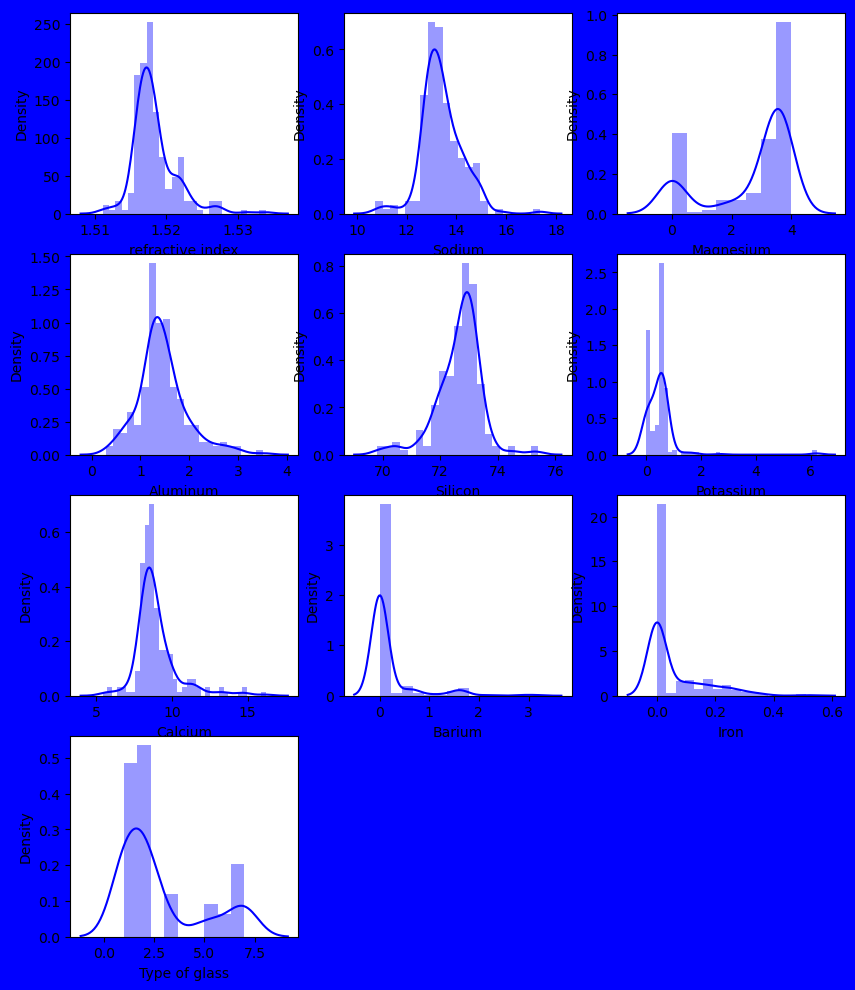

In [107]:
plt.figure(figsize=(10,12), facecolor='blue')
plotnumber=1

for i in df:
    if plotnumber<=10:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[i], color='b')
        plt.xlabel(i, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()

There are some outliers in some columns but I will check again by applying box plot

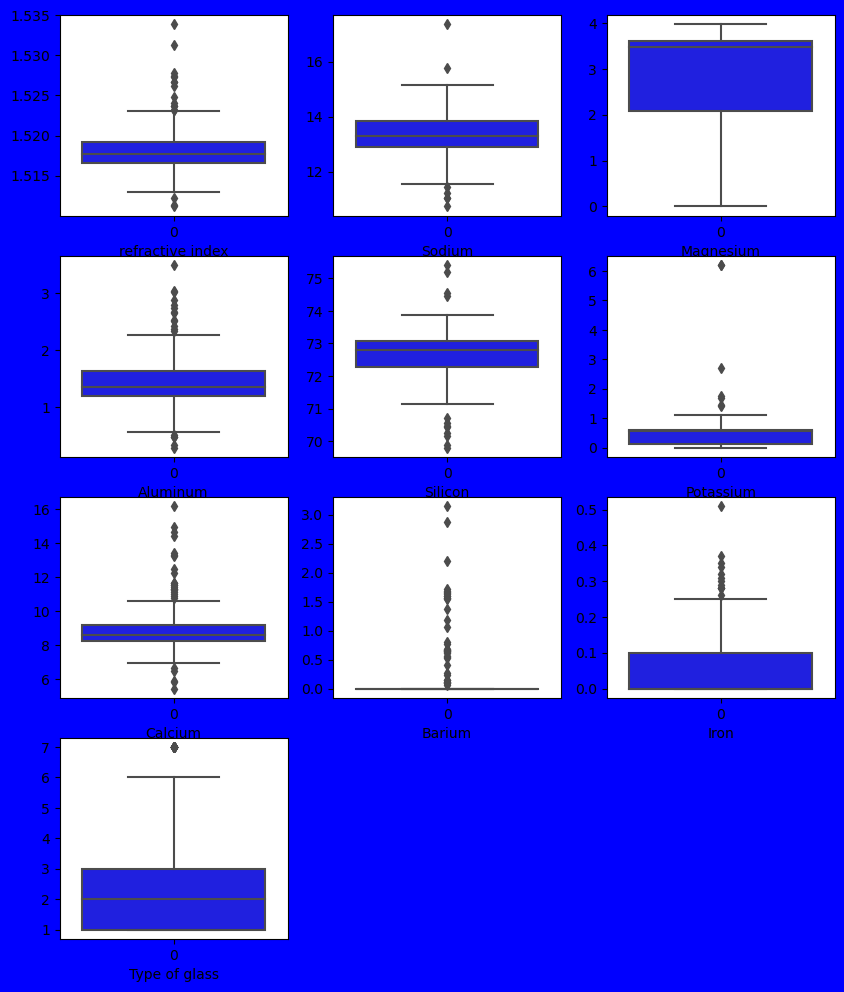

In [108]:
plt.figure(figsize=(10,12), facecolor='blue')
plotnumber=1

for i in df:
    if plotnumber<=10:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[i], color='b')
        plt.xlabel(i, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()

I can see there are some outliers in every columns so I will address this problem by applying zscore method.

In [109]:
x=df.drop('Type of glass', axis=1)

In [110]:
#Removing outlier using zscore and IQR technique 
from scipy.stats import zscore
z=np.abs(zscore(x))
z

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
0,0.245101,0.591880,0.642937,0.173500,0.097091,0.029329,0.792599,0.353808,0.588301
1,0.716826,0.150946,0.608144,0.187433,0.433777,0.167472,0.827734,0.353808,0.588301
2,0.228607,0.240996,0.705564,0.313863,0.058303,0.108813,0.518546,0.353808,0.588301
3,0.307777,0.167507,0.656854,0.414122,0.550322,0.078115,0.623951,0.353808,0.588301
4,0.789399,0.755419,0.649895,0.347848,0.407878,0.216258,0.623951,0.353808,2.082200
...,...,...,...,...,...,...,...,...,...
208,0.700332,0.898085,1.862164,2.874379,0.058303,0.643296,0.156046,1.778672,0.588301
209,0.495808,1.853443,1.862164,1.089766,0.524423,0.766090,0.392060,2.844912,0.588301
210,0.757727,1.167545,1.862164,1.149921,0.990604,0.766090,0.363952,2.945501,0.588301
211,0.607966,1.192041,1.862164,0.989506,1.236644,0.766090,0.335844,2.804676,0.588301


In [111]:
np.where(z>3)

(array([104, 105, 105, 105, 105, 105, 106, 106, 106, 109, 110, 111, 111,
        130, 144, 161, 162, 162, 162, 170, 170, 171, 171, 173, 183, 183,
        187, 188, 200, 200, 202, 206, 212], dtype=int64),
 array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
        5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))

In [112]:
df1=df[(z<3).all(axis=1)]

In [113]:
print("Total % of data loss after applying zscore is",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Total % of data loss after applying zscore is 9.389671361502346


After applying zscore method I have lost 9% data

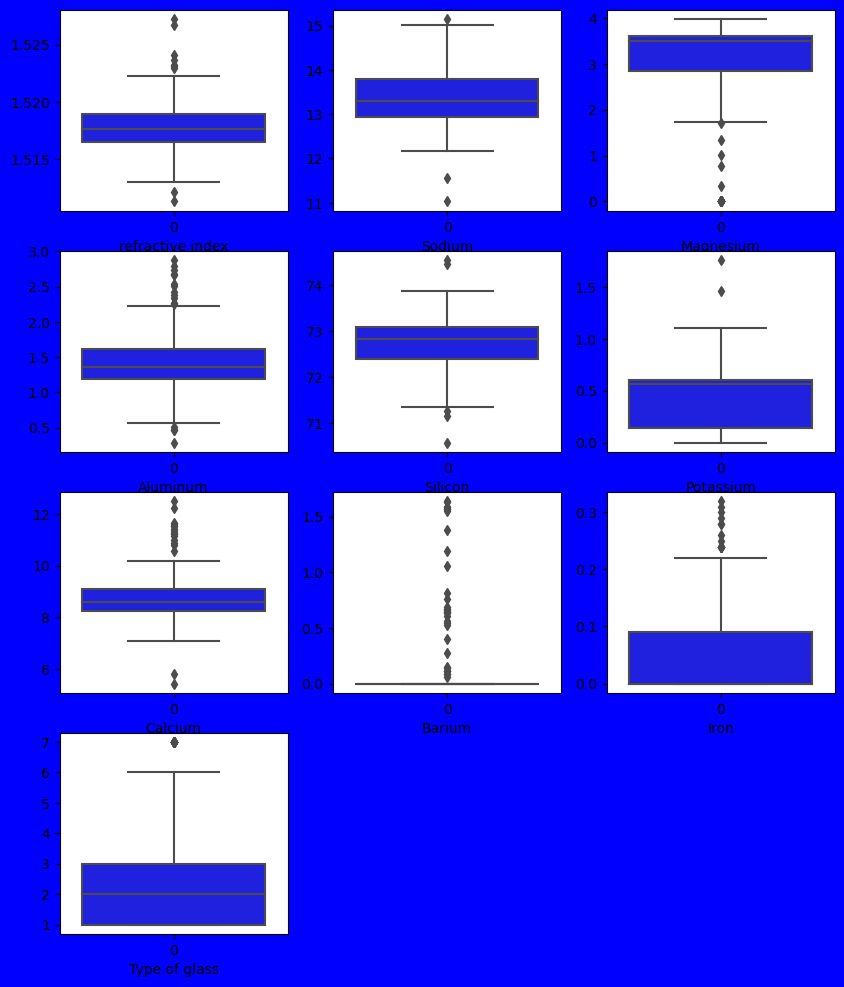

In [114]:
plt.figure(figsize=(10,12), facecolor='blue')
plotnumber=1

for i in df1:
    if plotnumber<=10:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df1[i], color='b')
        plt.xlabel(i, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()

Still there are some outliers but I can't afford to lose any more data.

In [115]:
df=df1

In [116]:
df.head()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [118]:
df_corr=df.corr().abs()

<Axes: >

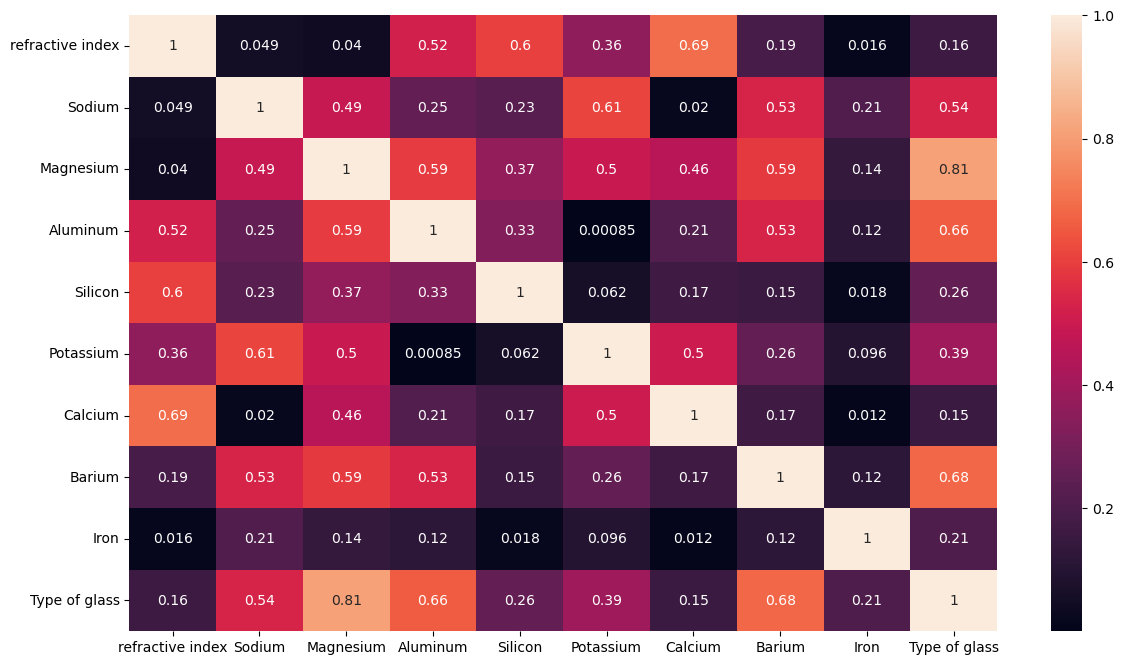

In [119]:
plt.figure(figsize=(14,8))
sns.heatmap(df_corr, annot=True, annot_kws={'size':10})

I think there is no any correlation in between features

In [123]:
x=df.drop('Type of glass', axis=1)
y=df['Type of glass']

In [126]:
print(x.shape)
print(y.shape)

(193, 9)
(193,)


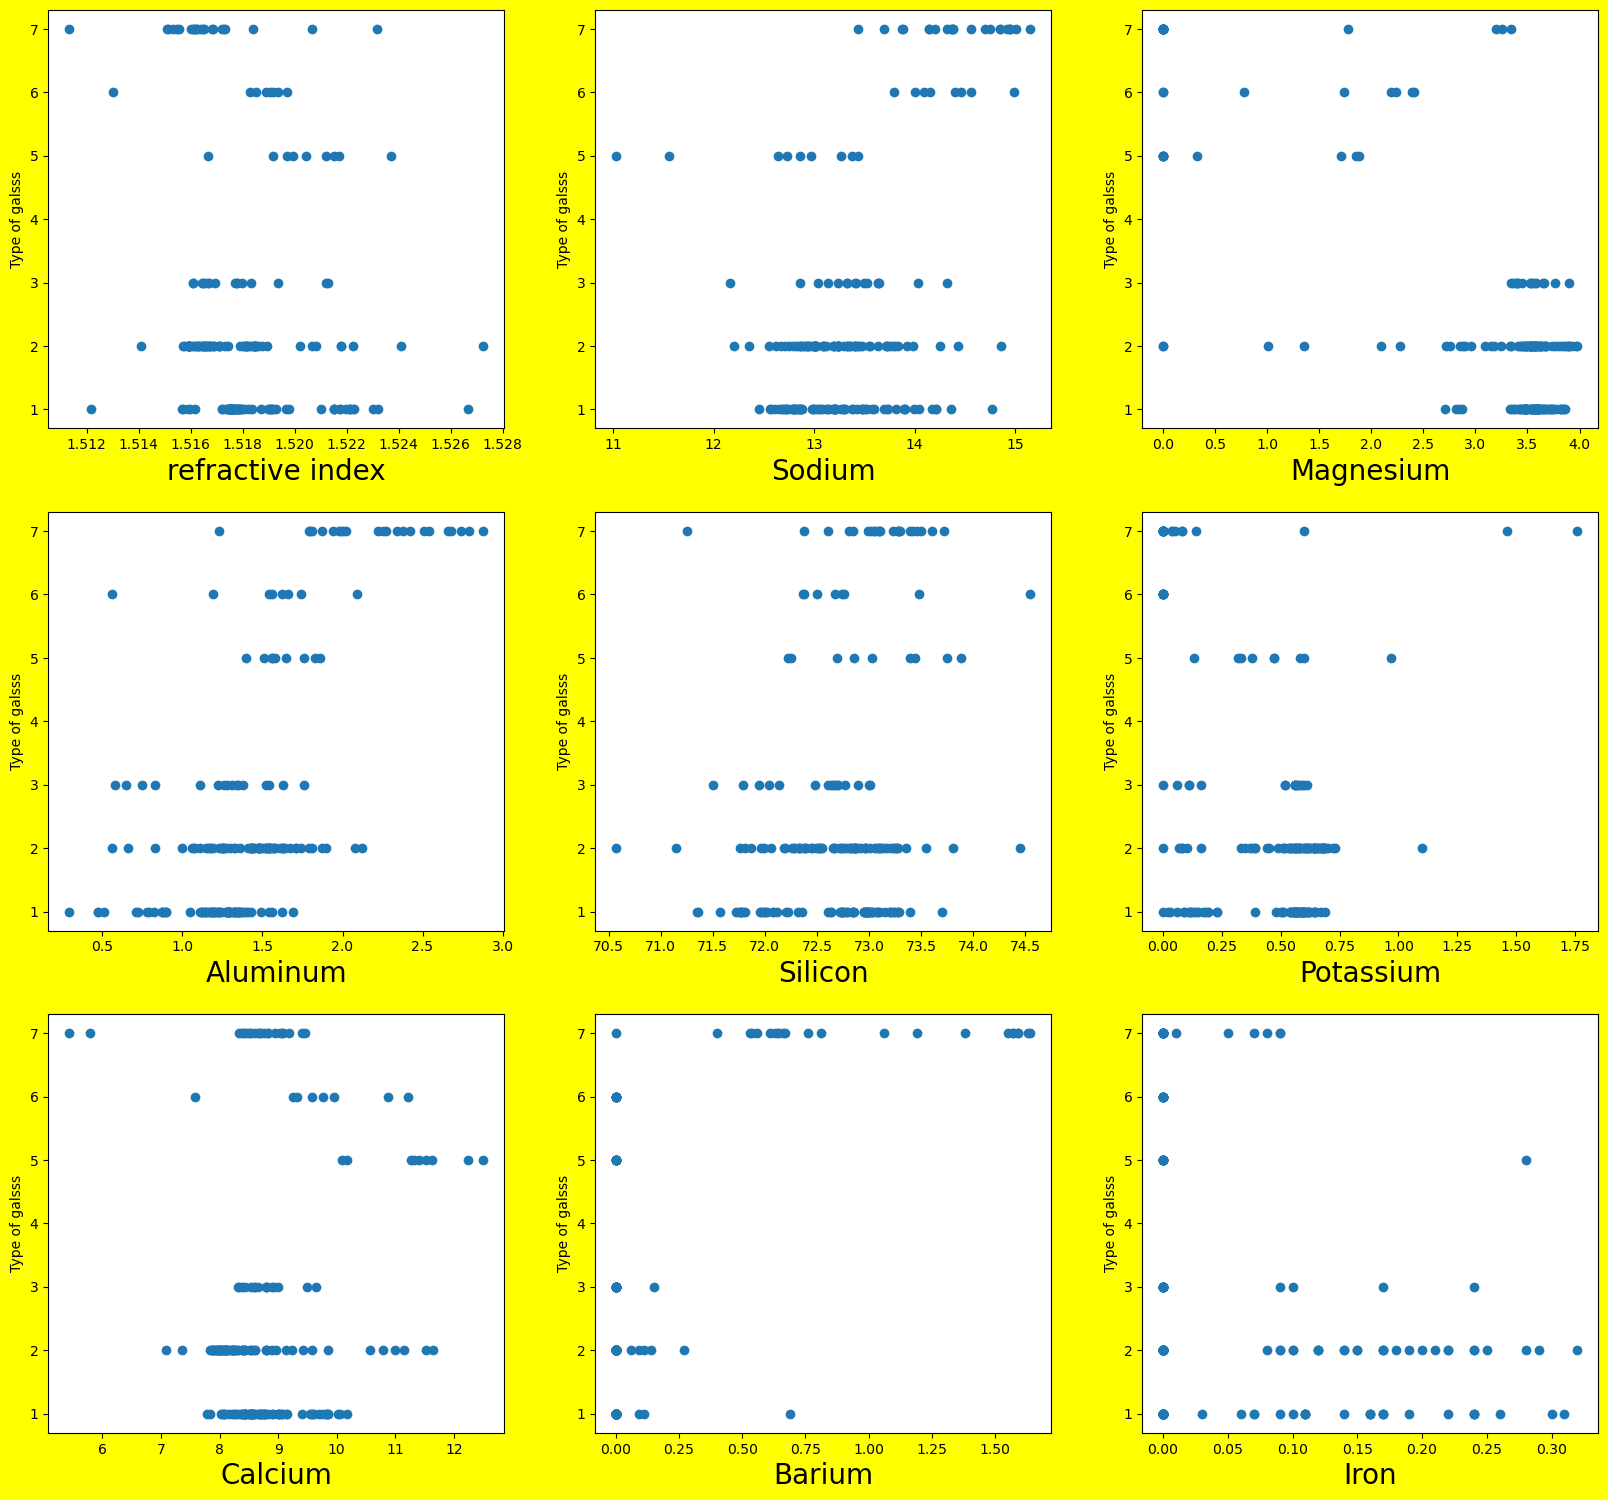

In [128]:
plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber=1

for column in x:
    if plotnumber<=10:
        ax=plt.subplot(4,3, plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Type of galsss')
        
    plotnumber+=1
plt.show()

In [129]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_scale=scale.fit_transform(x)

In [130]:
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [131]:
mac=0
mrs=0

for i in range(1, 300):
    x_train, x_test, y_train, y_test=tts(x_scale, y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>mac:
        mac=acc
        mrs=i
print("Best Accuracy score is :", mac*100, "at Random_state :", mrs)

Best Accuracy score is : 83.6734693877551 at Random_state : 251


In [132]:
 x_train, x_test, y_train, y_test=tts(x_scale, y, test_size=0.25, random_state=i)

In [133]:
def metric_score(clf,x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('\n===============================train result==============')
        print(f'Accuracy Score:{accuracy_score(y_train,y_pred)*100:2f}%')
           
    elif train==False:
        ypred=clf.predict(x_test)
        
        print('\n===============================test result==============')
        print(f'Accuracy Score:{accuracy_score(y_test,ypred)*100:2f}%')
            
        print("\n\nTest Classification Report\n", classification_report(y_test,ypred, digits=2))

In [135]:
etc=ExtraTreesClassifier()
rfc=RandomForestClassifier()
etc=ExtraTreesClassifier()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
lr=LogisticRegression()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()


In [136]:
models={'RandomForestClassifier':rfc,'ExtraTreesClassifier':etc,'LogisticRegression':lr,'KNeighborsClassifier':knn,'DecisionTreeClassifier':dtc,'GradientBoostingClassifier':gbc,'AdaBoostClassifier':abc,'BaggingClassifier':bc}

In [144]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print('Model Name is :', name)
    metric_score(model,x_train, x_test, y_train, y_test, train=True)
    metric_score(model,x_train, x_test, y_train, y_test, train=False)
    print('\n')

Model Name is : RandomForestClassifier

===============================train result==============
Accuracy Score:100.000000%

===============================test result==============
Accuracy Score:73.469388%


Test Classification Report
               precision    recall  f1-score   support

           1       0.68      0.68      0.68        19
           2       0.62      0.71      0.67        14
           3       0.50      0.33      0.40         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      0.89      0.94         9

    accuracy                           0.73        49
   macro avg       0.80      0.77      0.78        49
weighted avg       0.74      0.73      0.73        49



Model Name is : ExtraTreesClassifier

===============================train result==============
Accuracy Score:100.000000%

===============================test result==============
Accuracy Score:79.591837%


Test Cl

As per above report ExtraTreesClassifier is giving more accuracy than other models.

In [146]:
ypred=etc.predict(x_test)

In [148]:
score=cross_val_score(etc, x_scale,y)
print (score)
print(score.mean())
print("Difference between accuracy score & Cross Validation Score is", accuracy_score(y_test,ypred)-(score.mean()))

[0.64102564 0.74358974 0.66666667 0.65789474 0.71052632]
0.683940620782726
Difference between accuracy score & Cross Validation Score is 0.11197774656421278


In [149]:
ypredrfc=rfc.predict(x_test)
score=cross_val_score(rfc, x_scale,y)
print (score)
print(score.mean())
print("Difference between accuracy score & Cross Validation Score is", accuracy_score(y_test,ypredrfc)-(score.mean()))

[0.69230769 0.74358974 0.74358974 0.60526316 0.84210526]
0.7253711201079622
Difference between accuracy score & Cross Validation Score is 0.009322757443058216


After evaluating model by applying Cross Validation score technique, the best model is RandomForestClassifier

In [150]:
from sklearn.model_selection import GridSearchCV

In [152]:
param={'n_estimators': [13,15, 100, 200],
      'criterion':['entropy','gini'],
      'max_depth':[10,15,20,25],
      'min_samples_split':[10,11,12,13],
      'min_samples_leaf':[5,6,7,8,9]}

In [153]:
grd=GridSearchCV(rfc, param_grid=param)

In [154]:
grd.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15, 20, 25],
                         'min_samples_leaf': [5, 6, 7, 8, 9],
                         'min_samples_split': [10, 11, 12, 13],
                         'n_estimators': [13, 15, 100, 200]})

In [156]:
print('Best_param=', grd.best_params_)

Best_param= {'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}


In [157]:
rfc=grd.best_estimator_
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=15)

In [158]:
metric_score(rfc,x_train, x_test, y_train, y_test, train=True)
metric_score(rfc,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
Accuracy Score:89.583333%

===============================test result==============
Accuracy Score:63.265306%


Test Classification Report
               precision    recall  f1-score   support

           1       0.65      0.68      0.67        19
           2       0.47      0.50      0.48        14
           3       0.25      0.33      0.29         3
           5       1.00      0.50      0.67         2
           6       1.00      0.50      0.67         2
           7       1.00      0.89      0.94         9

    accuracy                           0.63        49
   macro avg       0.73      0.57      0.62        49
weighted avg       0.67      0.63      0.64        49



In [159]:
import joblib
joblib.dump(rfc,'Random Forest Classifier.pkl')

['Random Forest Classifier.pkl']